<a href="https://colab.research.google.com/github/simplyEmmanuel/NLP/blob/main/Defining_Terms_with_Word2Vec_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Define Terms

1. Import the data you chose from Kaggle in the first assignment and clean /preprocess the text data.

2. Build a word2vec model using the text.

3. Pick 3 target words and find the most similar words to them.

4. Describe what you can infer about the meaning of your three target words.

5. Compile and submit as html or pdf.

In [2]:
# Step 1: Importing the required Libraries and Dataset

# Required libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset (modify the file path as necessary)
df = pd.read_csv('/content/postings.csv')

# Display the first few rows of the dataset
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0.0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [3]:
# Step 2: Preprocessing the Text Data

# Checking for missing values in the 'description' column
print(df['description'].isnull().sum())

# Option 2: Droping rows with missing descriptions
df = df.dropna(subset=['description'])

# Define a function for text cleaning and preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove numbers and punctuation using regex
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_words = [word for word in words if word not in stop_words]

    # Join the words back into a single string
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

# Applying the cleaning function to the 'description' column
df['description_cleaned'] = df['description'].apply(preprocess_text)

# Displaying the first few rows of the cleaned text
df[['description', 'description_cleaned']].head()

5


,description,description_cleaned
0,Job descriptionA leading real estate firm in N...,job descriptiona leading real estate firm new ...
1,"At Aspen Therapy and Wellness , we are committ...",aspen therapy wellness committed serving clien...
2,The National Exemplar is accepting application...,national exemplar accepting applications assis...
3,Senior Associate Attorney - Elder Law / Trusts...,senior associate attorney elder law trusts est...
4,Looking for HVAC service tech with experience ...,looking hvac service tech experience commerica...


### 2. Build a word2vec model using the text.

In [4]:
# Step 1: install genism

!pip install gensim

In [5]:
# Step 2: Tokenize the Cleaned text

from nltk.tokenize import word_tokenize

# Tokenizing the cleaned job descriptions
df['tokenized_description'] = df['description_cleaned'].apply(word_tokenize)

# Display the first few rows of the tokenized text
df[['description_cleaned', 'tokenized_description']].head()

,description_cleaned,tokenized_description
0,job descriptiona leading real estate firm new ...,"[job, descriptiona, leading, real, estate, fir..."
1,aspen therapy wellness committed serving clien...,"[aspen, therapy, wellness, committed, serving,..."
2,national exemplar accepting applications assis...,"[national, exemplar, accepting, applications, ..."
3,senior associate attorney elder law trusts est...,"[senior, associate, attorney, elder, law, trus..."
4,looking hvac service tech experience commerica...,"[looking, hvac, service, tech, experience, com..."


In [6]:
# Step 3: Build the Word2Vec Model for the dataset

from gensim.models import Word2Vec

# Build the Word2Vec model
# Parameters:
# - vector_size: size of the word vectors (dimensionality of the feature vectors)
# - window: context window size
# - min_count: ignores all words with total frequency lower than this
# - workers: number of CPU cores used for training

word2vec_model = Word2Vec(
    sentences=df['tokenized_description'],
    vector_size=100,  # you can adjust the vector size as needed
    window=5,
    min_count=2,  # only consider words that appear at least twice
    workers=4,  # number of CPU cores
    sg=0  # CBOW model; use sg=1 for Skip-Gram
)

# Train the Word2Vec model
word2vec_model.train(df['tokenized_description'], total_examples=len(df['tokenized_description']), epochs=10)


(265570534, 273979160)

In [7]:
# Step 4: Let's explore the Word2Vec Model

# Find similar words to 'data'
similar_words = word2vec_model.wv.most_similar('data', topn=10)
print(similar_words)

# Find similar words to 'data'
similar_words = word2vec_model.wv.most_similar('data', topn=10)
print(similar_words)

# Save the model
word2vec_model.save("word2vec_job_postings.model")




[('datasets', 0.6672232151031494), ('metadata', 0.6550245881080627), ('dataexperience', 0.632704496383667), ('database', 0.6119986772537231), ('dataknowledge', 0.5981826782226562), ('etl', 0.589954674243927), ('databases', 0.5765793323516846), ('attribution', 0.5721908807754517), ('datainformation', 0.5645239949226379), ('responsibilitiesdata', 0.55913245677948)]
[('datasets', 0.6672232151031494), ('metadata', 0.6550245881080627), ('dataexperience', 0.632704496383667), ('database', 0.6119986772537231), ('dataknowledge', 0.5981826782226562), ('etl', 0.589954674243927), ('databases', 0.5765793323516846), ('attribution', 0.5721908807754517), ('datainformation', 0.5645239949226379), ('responsibilitiesdata', 0.55913245677948)]


The output from the Word2Vec model provides a list of words similar to "data" along with their similarity scores. For example, the model identified words like "datasets", "metadata", "database", and "etl" as similar to "data," which indicates that these terms likely appeared in similar contexts within the job postings.

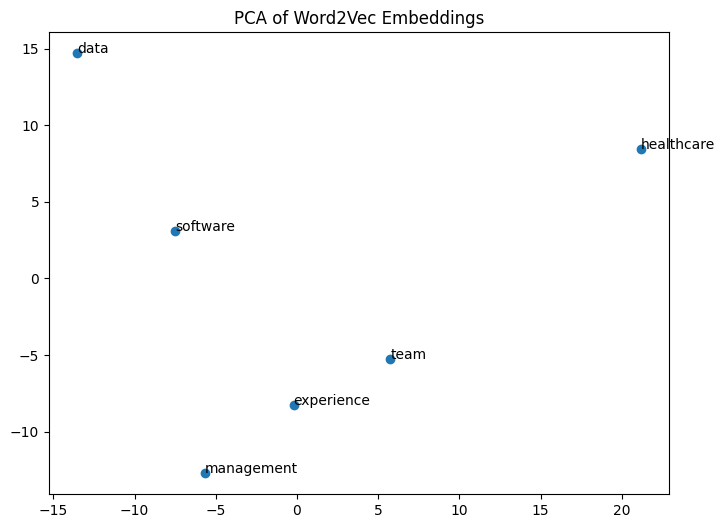

In [8]:
# Visualizing Word Embeddings:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a few words to visualize
words = ['data', 'management', 'healthcare', 'team', 'experience', 'software']

# Get their word vectors
word_vectors = [word2vec_model.wv[word] for word in words]

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])

# Annotate words on the plot
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title("PCA of Word2Vec Embeddings")
plt.show()


4. Describe what you can infer about the meaning of your three target words.